# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os


os.chdir('/content/drive/MyDrive/Colab Notebooks/수업/20220126/')

# 변수 설명
  - **int_rate** : 대출자에 부여된 이자율 (Interest rate of the loan the applicant received)
  - **annual_inc** : 연 소득 (annual income)
  - **dti** : 소득 대비 부채 비율 (Debt-to-income ratio)
  - **delinq_2yrs** : 지난 2년 간 체납 발생 횟수 (Delinquencies on lines of credit in the last 2 years)
  - **inq_last_6mths** : 지난 6개월 간 신용 조회 수 (Inquiries into the applicant's credit during the last 6 months)
  - **pub_rec** : 파산 횟수 (Number of bankruptcies listed in the public record)
  - **revol_bal** : 리볼빙 잔액 (Total credit revolving balance)
  - **total_acc** : 지금까지 소유했던 신용카드 개수 (num_total_cc_accounts : Total number of credit card accounts in the applicant's history)
  - **collections_12_mths_ex_med** : 의료부문을 제외한 지난 12개월 간 추심 발생 횟수 (num_collections_last_12m : Number of collections in the last 12 months. This excludes medical collections)
  - **acc_now_delinq** : 대출자가 체납 상태에 있지 않은 계좌의 수 (The number of accounts on which the borrower is now delinquent)
  - **tot_coll_amt** : 대출자에 대한 현재까지의 총 추심액 (total_collection_amount_ever : The total amount that the applicant has had against them in collections)
  - **tot_cur_bal** : 전 계좌의 현재 통합 잔고 (Total current balance of all accounts)
  - **chargeoff_within_12_mths** : 대출 부 신청인의 대출 신청 직전 12개월 간 세금 공제 횟수 (Number of charge-offs within last 12 months at time of application for the secondary applicant)
  - **delinq_amnt** : 체납 금액 (delinquency amount)
  - **tax_liens** : 세금 저당권의 수 (Number of tax liens)
  - **emp_length1 ~ 12** : 고용 연수 (Number of years in the job)
  - **home_ownership1 ~ 6** : 대출 신청자의 주거 소유 형태 (The ownership status of the applicant's residence)
  - **verification_status1 ~ 3** : 공동 소득 발생 여부 및 형태 (verification_income_joint : Type of verification of the joint income)
  - **purpose1 ~ 14** : 대출 목적 (The purpose of the loan)
  - **initial_list_status1 ~ 2** : 최초 대출 상태 (Initial listing status of the loan)
  - **mths_since_last_delinq1 ~ 11** : 마지막 체납이 지금으로부터 몇개월 전에 있었는지를 나타내는 변수 (Months since the last delinquency)
  
  - **funded_amnt** : 대출액 (Funded amount)
  - **funded_amnt_inv** : 사채 대출액 (Funded amount by investors)
  - **total_rec_late_fee** : 총 연체료 중 납부액 (Late fees received to date)
  - **term1** : 상환 기간 (The number of payments on the loan. Values are in months and can be either 36 or 60)
  - **open_acc** : 개설 개좌 수 (The number of open credit lines in the borrower's credit file)
  - **installment** : 대출 발생 시 월 상환액 (The monthly payment owed by the borrower if the loan originates)
  - **revol_util** : 리볼빙 한도 대비 리볼빙 사용 비율 (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit)
  - **out_prncp** : 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded)
  - **out_prncp_inv** : 사채 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded by investors)
  - **total_rec_int** : 이자 상환액 (Interest received to date)
  - **fico_range_low** : FICO(일종의 신용점수) 최저값 (The lower boundary range the borrower’s FICO at loan origination belongs to)
  - **fico_range_high** : FICO(일종의 신용점수) 최고값 (The upper boundary range the borrower’s FICO at loan origination belongs to)
  
  - **depvar** : 고객의 부도 여부 (dependent variable)

In [ ]:
df = pd.read_csv('./data/train.csv')
df.head(5)

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1


In [ ]:
test_df = pd.read_csv('./data/test.csv')

# EDA

## 각 categorial feature 별 col 생성 및 분포 확인

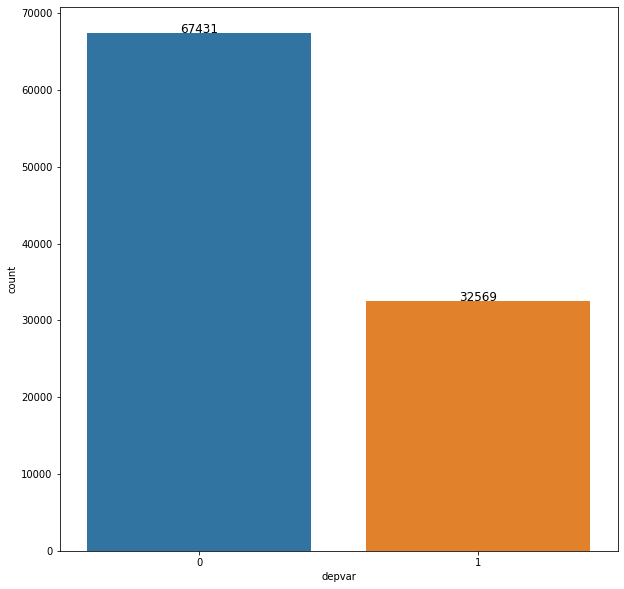

In [ ]:
# 목표 변수 분포 확인(부도 여부)
plt.figure(figsize=(10,10))
ax = sns.countplot(x='depvar', data=df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, p.get_height(), ha = 'center', size = 12)

plt.show()

In [ ]:
# 고용 연수 col 생성
df['emp_length'] = df['emp_length1'] + 2 * df['emp_length2'] + 3 * df['emp_length3'] + 4 * df['emp_length4'] + 5 * df['emp_length5']\
            + 6 * df['emp_length6'] + 7 * df['emp_length7'] + 8 * df['emp_length8'] + 9 * df['emp_length9'] + 10 * df['emp_length10']\
            + 11 * df['emp_length11'] + 12 * df['emp_length12']
df['emp_length'] = df['emp_length'].astype("category")

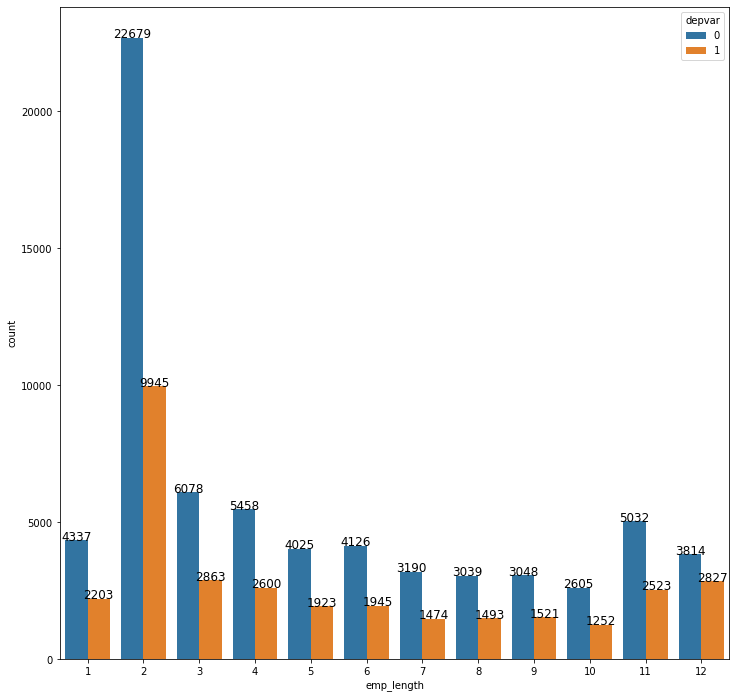

In [ ]:
# 고용 연수 분포
# 2년동안 일한 사람의 비율이 매우 높았다.

plt.figure(figsize=(12,12))
ax = sns.countplot(x='emp_length', hue='depvar', data=df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, p.get_height(), ha = 'center', size = 12)

plt.show()

In [ ]:
# 주거 소유 형태 col 생성
df['home_ownership'] = df['home_ownership1'] + 2 * df['home_ownership2'] + 3 * df['home_ownership3'] + 4 * df['home_ownership4']\
                        + 5 * df['home_ownership5'] + 6 * df['home_ownership6']
df['home_ownership'] = df['home_ownership'].astype("category")

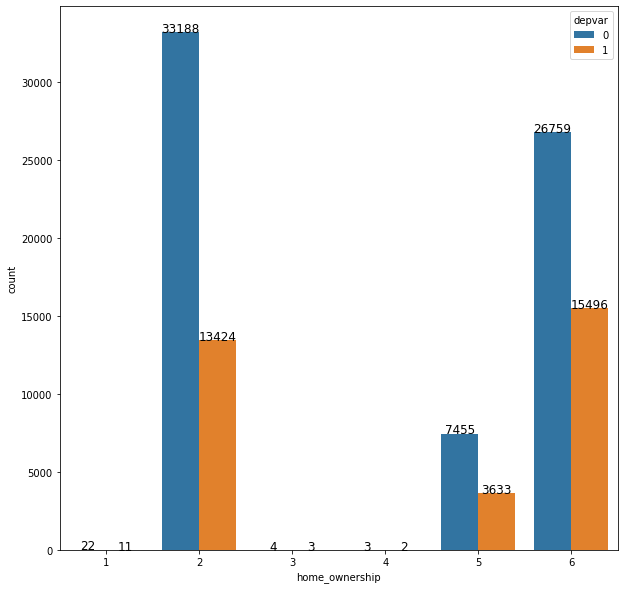

In [ ]:
# 주거 소유 형태 분포 확인
# 1, 3, 4 유형에 해당하는 data가 매우 적다.

plt.figure(figsize=(10,10))
ax = sns.countplot(x='home_ownership', hue='depvar', data=df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, p.get_height(), ha = 'center', size = 12)

plt.show()

In [ ]:
# 공동 소득 형태 col 생성
df['verification_status'] = df['verification_status1'] + 2 * df['verification_status2'] + 3 * df['verification_status3']
df['verification_status'] = df['verification_status'].astype("category")

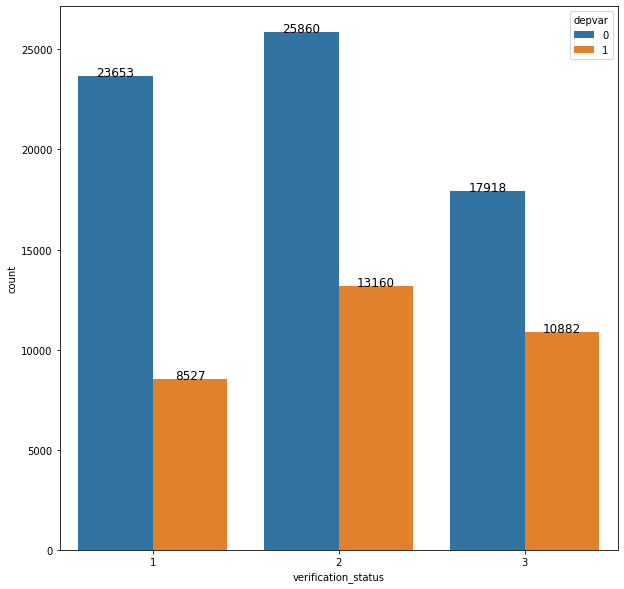

In [ ]:
# 공동 소득 형태 분포 확인

plt.figure(figsize=(10,10))
ax = sns.countplot(x='verification_status', hue='depvar', data=df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, p.get_height(), ha = 'center', size = 12)

plt.show()

In [ ]:
# 대출 목적 col 생성
df['purpose'] = df['purpose1'] + 2 * df['purpose2'] + 3 * df['purpose3'] + 4 * df['purpose4'] + 5 * df['purpose5']\
            + 6 * df['purpose6'] + 7 * df['purpose7'] + 8 * df['purpose8'] + 9 * df['purpose9'] + 10 * df['purpose10']\
            + 11 * df['purpose11'] + 12 * df['purpose12'] + 13 * df['purpose13'] + 14 * df['purpose14']
df['purpose'] = df['purpose'].astype("category")

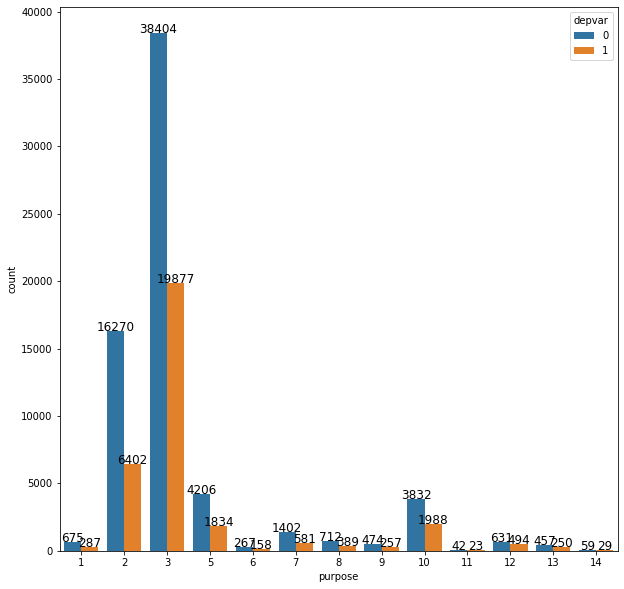

In [ ]:
# 대출 목적 분포 확인
# 2, 3 유형의 비율이 높았다.

plt.figure(figsize=(10,10))
ax = sns.countplot(x='purpose', hue='depvar', data=df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, p.get_height(), ha = 'center', size = 12)

plt.show()

In [ ]:
# 최초 대출 상태 col 생성
df['initial_list_status'] = df['initial_list_status1'] + 2 * df['initial_list_status2']
df['initial_list_status'] = df['initial_list_status'].astype("category")

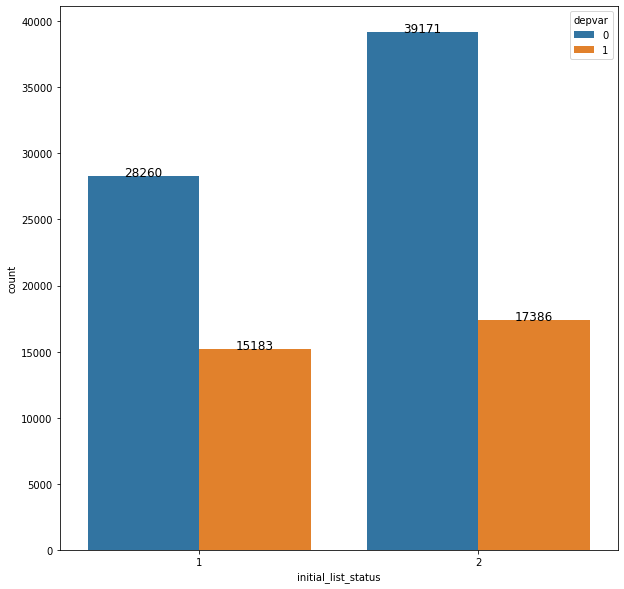

In [ ]:
# 최초 대출 상태 분포 확인

plt.figure(figsize=(10,10))
ax = sns.countplot(x='initial_list_status', hue='depvar', data=df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, p.get_height(), ha = 'center', size = 12)

plt.show()

In [ ]:
# 마지막 체납 col 생성
df['mths_since_last_delinq'] = df['mths_since_last_delinq1'] + 2 * df['mths_since_last_delinq2'] + 3 * df['mths_since_last_delinq3'] + 4 * df['mths_since_last_delinq4']\
                                + 5 * df['mths_since_last_delinq5'] + 6 * df['mths_since_last_delinq6'] + 7 * df['mths_since_last_delinq7'] + 8 * df['mths_since_last_delinq8']\
                                + 9 * df['mths_since_last_delinq9'] + 10 * df['mths_since_last_delinq10'] + 11 * df['mths_since_last_delinq11']
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].astype("category")

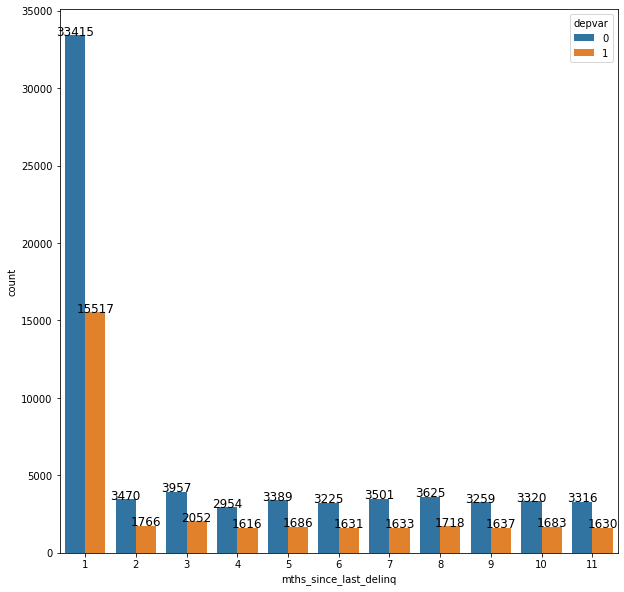

In [ ]:
# 마지막 체납 분포 확인
# 1개월 전의 비율이 높았다.
plt.figure(figsize=(10,10))
ax = sns.countplot(x='mths_since_last_delinq', hue='depvar', data=df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, p.get_height(), ha = 'center', size = 12)

plt.show()

## 나머지 feature 에 대한 분포 확인

In [ ]:
df.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_l

In [ ]:
remain_features = ['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'funded_amnt', 'funded_amnt_inv',
       'total_rec_late_fee', 'term1', 'open_acc', 'installment', 'revol_util',
       'out_prncp', 'out_prncp_inv', 'total_rec_int', 'fico_range_low',
       'fico_range_high']

In [ ]:
df[remain_features].describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.130833,7.436061e+04,18.514508,0.343700,0.668880,0.235720,16090.202820,24.675910,0.018810,0.005800,250.588120,1.305281e+05,0.009630,19.288330,0.063820,13735.317750,13729.341073,2.448885e+00,0.855920,11.620700,434.077648,0.537233,0.253327,0.253259,2491.282802,692.630550,696.630660
std,0.044773,7.467409e+04,8.413049,0.905007,0.952044,0.661468,21569.939271,11.883834,0.150321,0.083585,2042.770881,1.503326e+05,0.110079,893.304366,0.468027,8464.825314,8461.694483,1.489496e+01,0.351173,5.458774,265.921746,0.239373,18.053290,18.051746,2706.262200,29.668017,29.668584
min,0.053200,5.360000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.000000,800.000000,-2.000000e-09,0.000000,1.000000,23.360000,0.000000,0.000000,0.000000,0.000000,660.000000,664.000000
25%,0.097500,4.500000e+04,12.200000,0.000000,0.000000,0.000000,6009.000000,16.000000,0.000000,0.000000,0.000000,2.698900e+04,0.000000,0.000000,0.000000,7200.000000,7200.000000,0.000000e+00,1.000000,8.000000,240.292500,0.361000,0.000000,0.000000,857.292500,670.000000,674.000000
50%,0.127400,6.200000e+04,18.060000,0.000000,0.000000,0.000000,11030.500000,23.000000,0.000000,0.000000,0.000000,6.802350e+04,0.000000,0.000000,0.000000,12000.000000,12000.000000,0.000000e+00,1.000000,11.000000,366.370000,0.541000,0.000000,0.000000,1615.160000,685.000000,689.000000
75%,0.158000,9.000000e+04,24.530000,0.000000,1.000000,0.000000,19540.000000,31.000000,0.000000,0.000000,0.000000,1.943098e+05,0.000000,0.000000,0.000000,19200.000000,19200.000000,0.000000e+00,1.000000,14.000000,575.860000,0.720000,0.000000,0.000000,3039.115000,705.000000,709.000000
max,0.309900,8.300000e+06,49.930000,20.000000,6.000000,63.000000,971736.000000,176.000000,5.000000,6.000000,197765.000000,3.164353e+06,7.000000,94521.000000,63.000000,40000.000000,40000.000000,8.741700e+02,1.000000,82.000000,1584.900000,8.923000,2330.970000,2330.970000,28005.960000,845.000000,850.000000


In [ ]:
df['term1'].value_counts()

1    85592
0    14408
Name: term1, dtype: int64

In [ ]:
c = df[df['total_rec_int']==0]
c.count()

int_rate                  170
annual_inc                170
dti                       170
delinq_2yrs               170
inq_last_6mths            170
                         ... 
home_ownership            170
verification_status       170
purpose                   170
initial_list_status       170
mths_since_last_delinq    170
Length: 82, dtype: int64

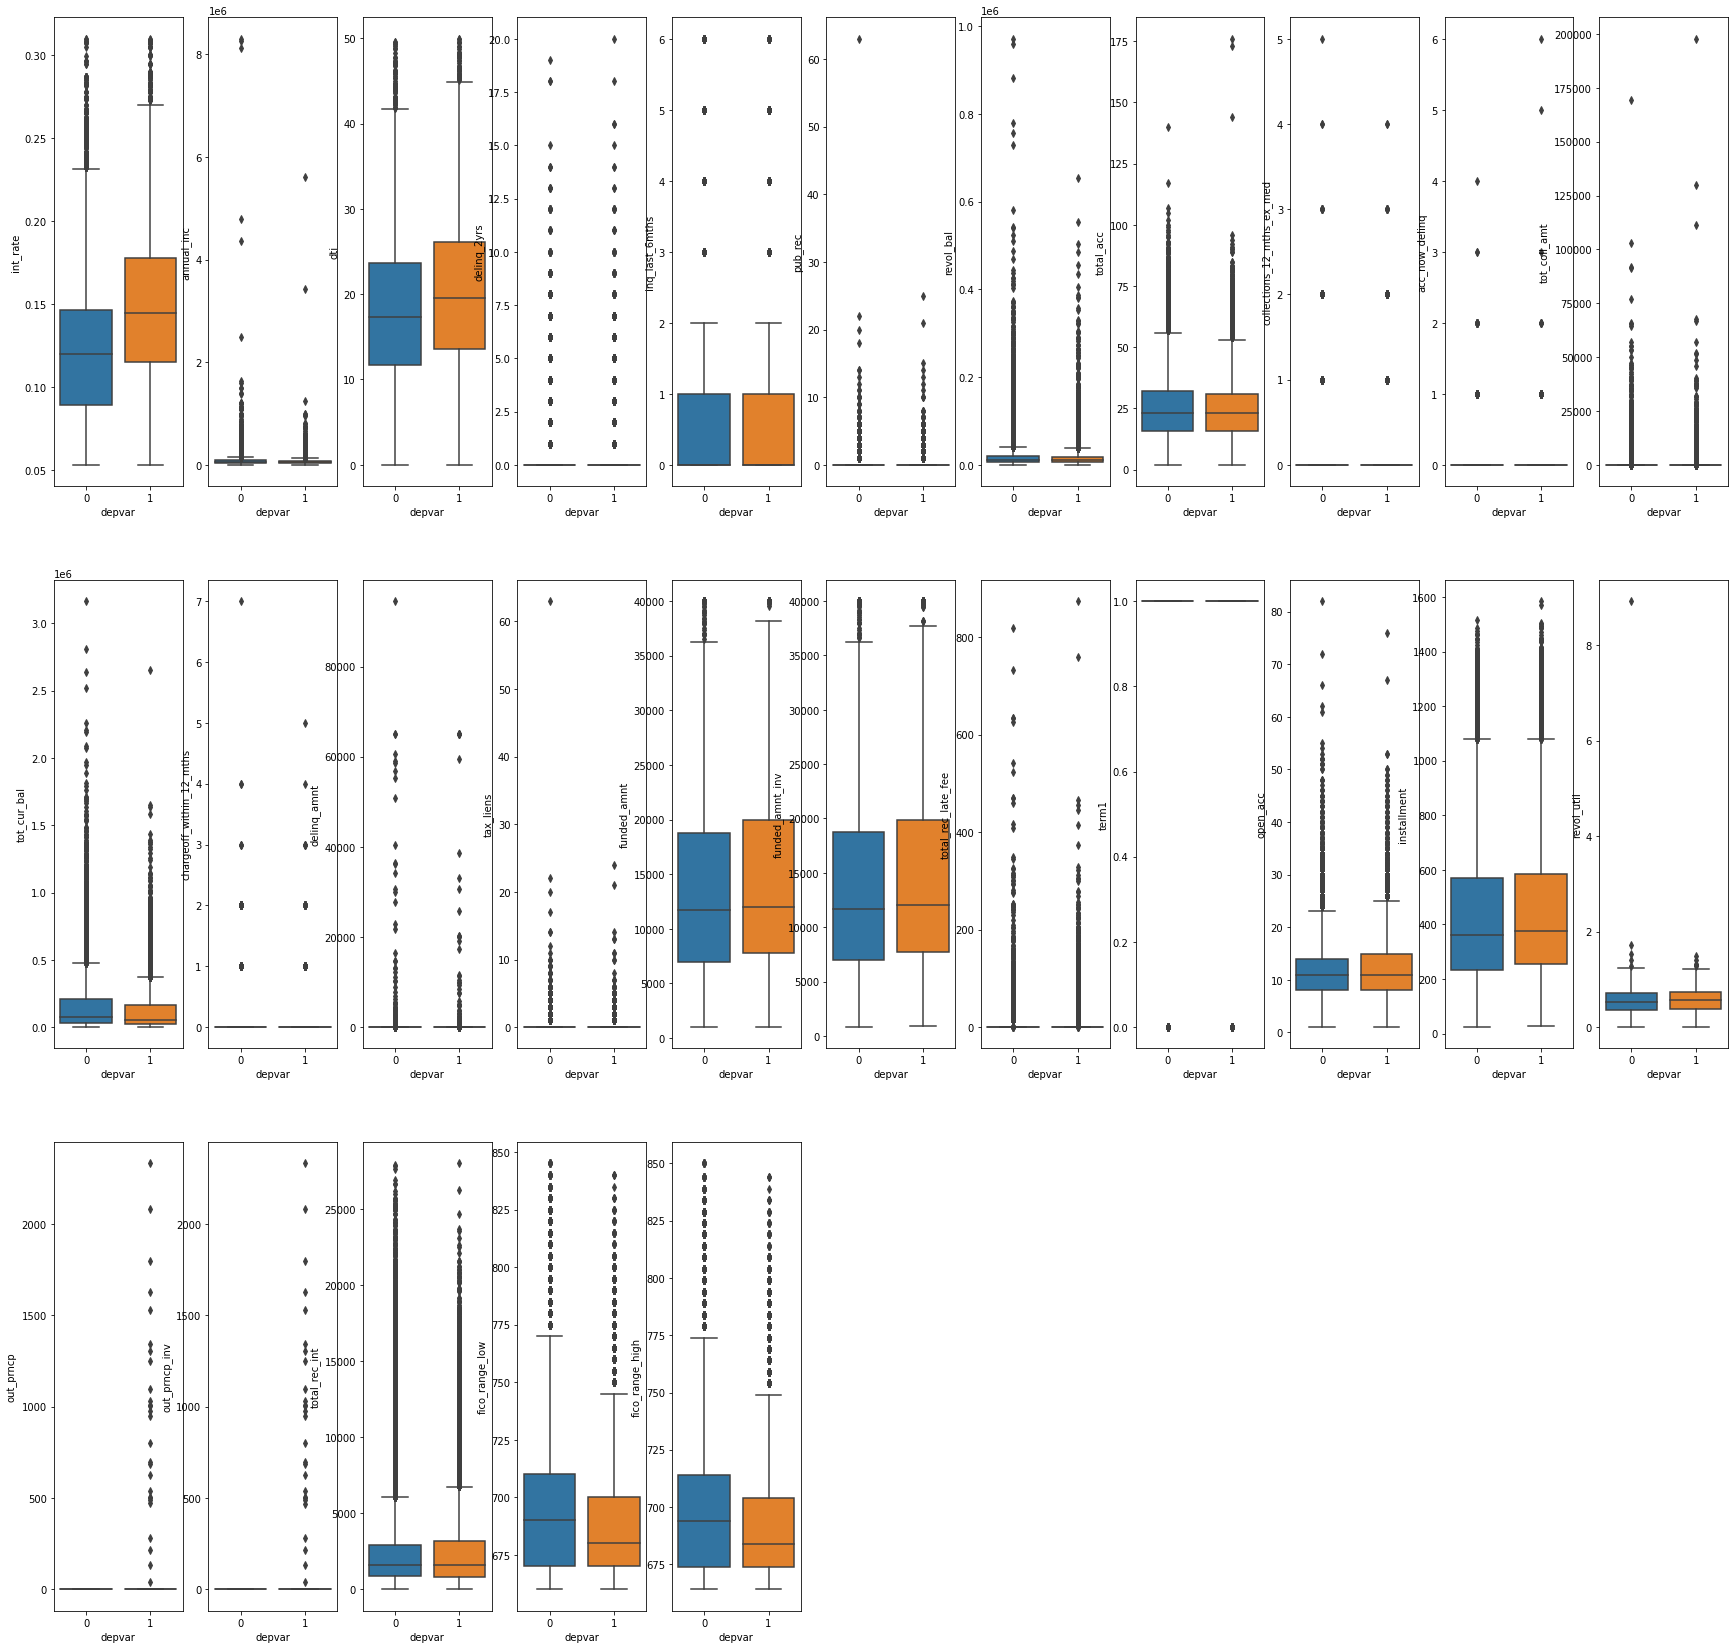

In [ ]:
plt.figure(figsize=(30,50))
count = 1

for i in remain_features:
    plt.subplot(5, 11, count)
    p = sns.boxplot(df['depvar'], df[i])
    count += 1
plt.show()

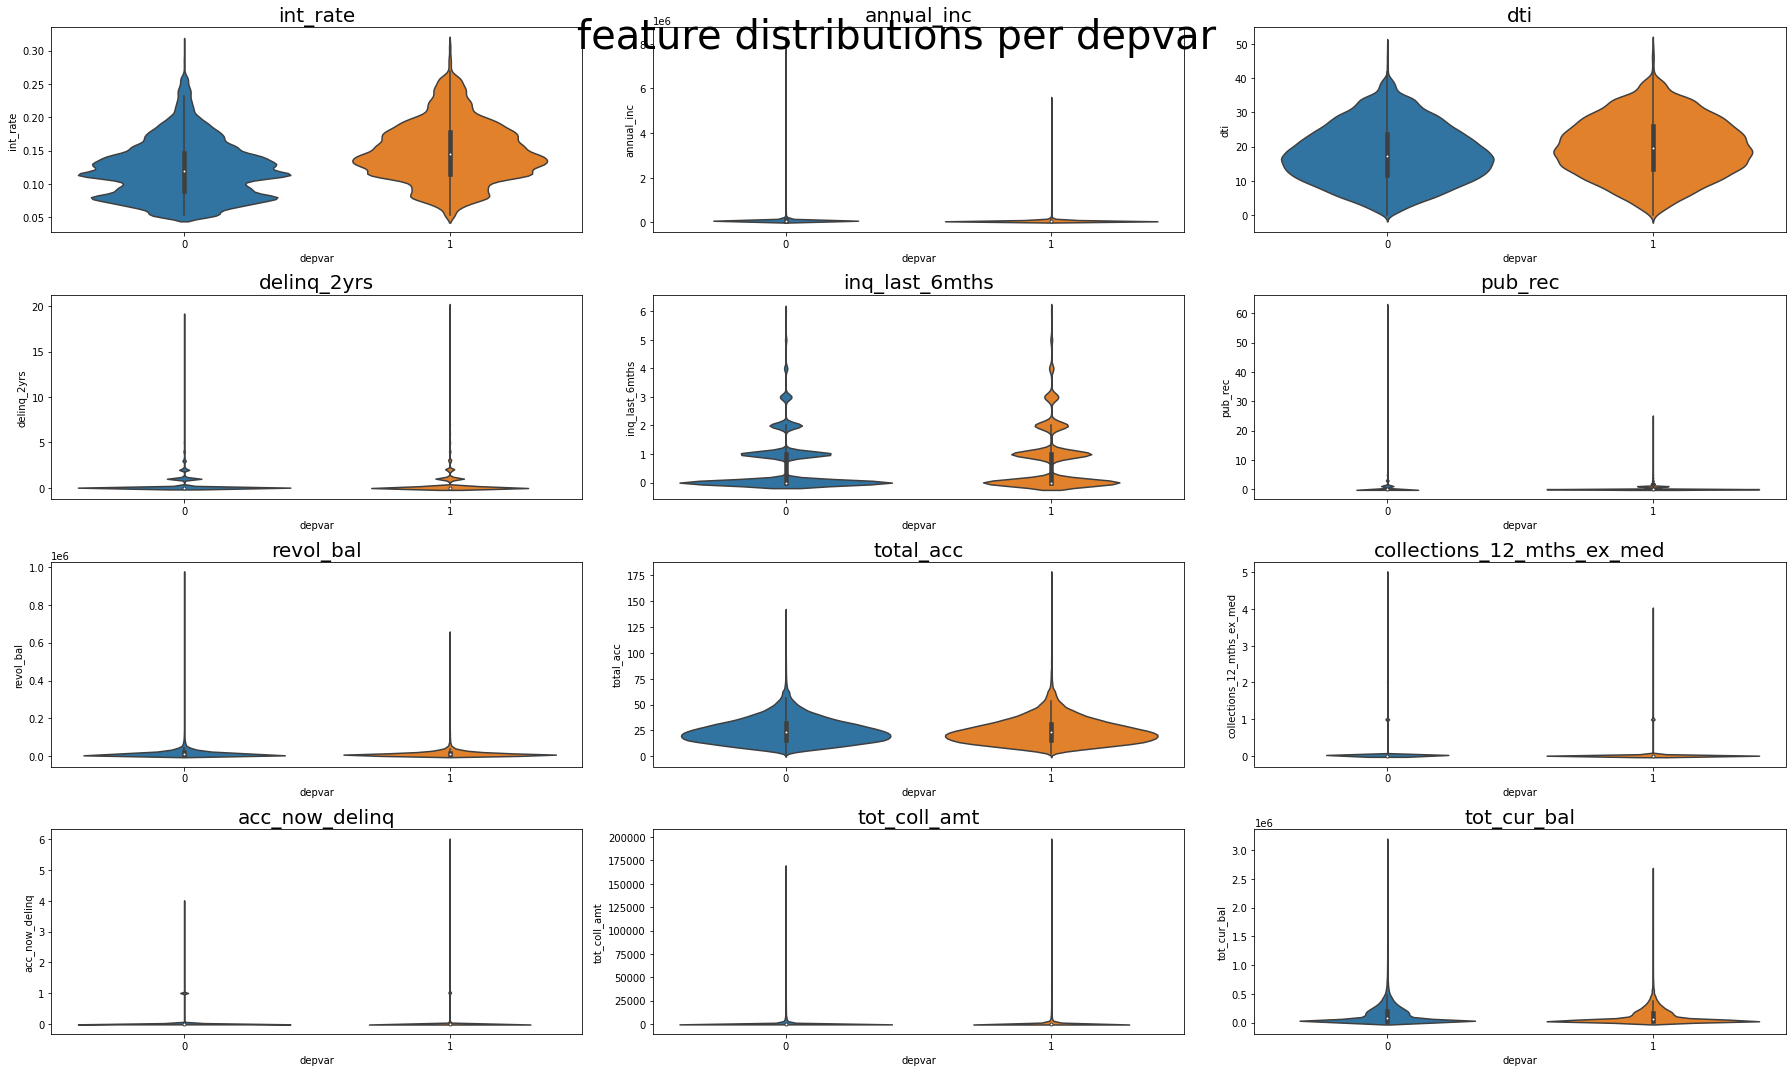

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(25, 15))

fig.suptitle('feature distributions per depvar', fontsize= 40)
for ax, col in zip(axes.flat, remain_features):
    sns.violinplot(x= 'depvar', y= col, ax=ax, data=df)
    ax.set_title(col, fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df_0 = df[df.depvar == 0]
df_1 = df[df.depvar == 1]

In [ ]:
df_0['out_prncp'].value_counts()

0.0    67431
Name: out_prncp, dtype: int64

In [ ]:
df_0['out_prncp_inv'].value_counts()

0.0    67431
Name: out_prncp_inv, dtype: int64

In [ ]:
df_1['out_prncp'].value_counts()

0.00       32542
2330.97        1
1247.52        1
2081.26        1
471.70         1
1345.74        1
1796.48        1
539.36         1
43.26          1
136.24         1
492.07         1
698.61         1
1002.31        1
216.74         1
949.15         1
1095.77        1
1628.56        1
499.52         1
1305.93        1
800.80         1
687.93         1
1033.47        1
508.00         1
975.05         1
1006.80        1
283.37         1
1527.69        1
628.43         1
Name: out_prncp, dtype: int64

In [ ]:
check = df['fico_range_high'] - df['fico_range_low']
check.value_counts()

4    99989
5       11
dtype: int64

In [ ]:
df[check == 5]

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,...,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar,emp_length,home_ownership,verification_status,purpose,initial_list_status,mths_since_last_delinq
9597,0.0603,50000.0,1.01,0,0,0,519,24,0,0,0,54825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3500,3500.0,0.0,1,11,106.53,0.016,0.0,0.0,254.48,845,850,0,12,2,3,5,1,1
15336,0.0532,140000.0,1.91,0,0,0,210,32,0,0,0,251132,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,4000,4000.0,0.0,1,10,120.46,0.008,0.0,0.0,200.24,845,850,0,2,2,3,10,1,1
30330,0.0759,45000.0,15.25,0,0,0,725,33,0,0,0,71653,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1000,1000.0,0.0,1,14,31.15,0.027,0.0,0.0,44.14,845,850,0,2,5,1,2,2,1
35061,0.0649,80000.0,16.13,0,0,0,1407,33,0,0,0,150135,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,14000,14000.0,0.0,1,9,429.03,0.025,0.0,0.0,553.57,845,850,0,8,2,2,3,1,1
56432,0.0593,111000.0,6.54,0,1,0,1741,29,0,0,0,188250,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,9600,9600.0,0.0,1,9,291.75,0.035,0.0,0.0,868.82,845,850,0,2,2,1,5,2,1
67712,0.0532,80000.0,19.52,0,1,0,3138,35,0,0,0,399343,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,5000,5000.0,0.0,1,24,150.58,0.023,0.0,0.0,417.26,845,850,0,3,2,2,3,2,1
74664,0.0532,92000.0,8.54,0,0,0,1544,19,0,0,0,75166,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,15000,15000.0,0.0,1,8,451.73,0.027,0.0,0.0,1253.09,845,850,0,4,2,1,5,2,1
77638,0.1114,155000.0,4.85,0,0,0,1260,24,0,0,0,317708,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,35000,35000.0,0.0,1,12,1148.18,0.029,0.0,0.0,6334.35,845,850,0,11,6,3,3,1,1
90755,0.0971,280000.0,7.04,0,0,0,7750,53,0,0,0,380399,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,8500,8500.0,0.0,1,21,273.12,0.082,0.0,0.0,1324.92,845,850,0,2,5,3,9,1,1
92387,0.0668,200000.0,0.61,0,0,0,5952,15,0,0,0,336377,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,22400,22400.0,0.0,1,7,688.38,0.000,0.0,0.0,1160.07,845,850,0,2,2,1,5,2,1


In [ ]:
df_0['fico_range_high'].value_counts()

664    6068
674    5865
669    5783
679    5282
684    5245
689    4552
694    4453
699    4007
704    3622
709    3376
714    2996
719    2596
724    2270
729    1775
734    1465
739    1156
744     997
749     823
754     796
759     659
764     553
769     507
774     408
779     376
784     342
789     254
794     251
799     222
804     163
809     150
819     111
814     111
824      66
829      53
834      27
839      23
844      17
850      11
Name: fico_range_high, dtype: int64

In [ ]:
check_0 = df_0['fico_range_high'] - df_0['fico_range_low']
check_0.value_counts()

4    67420
5       11
dtype: int64

In [ ]:
check_1 = df_1['fico_range_high'] - df_1['fico_range_low']
check_1.value_counts()

4    32569
dtype: int64

In [ ]:
df[df['annual_inc'] > 250000].describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
count,965.000000,9.650000e+02,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,9.650000e+02,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.0,965.000000,965.0,965.0,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.0,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.0,965.0,965.000000,965.000000,965.000000,965.00000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.0,965.0,965.000000,965.000000,965.000000,965.000000
mean,0.112343,4.294068e+05,10.404819,0.429016,0.754404,0.273575,63241.449741,31.451813,0.017617,0.010363,158.619689,5.290587e+05,0.015544,64.544041,0.204145,0.047668,0.394819,0.090155,0.079793,0.069430,0.061140,0.061140,0.041451,0.049741,0.036269,0.055959,0.012435,0.0,0.662176,0.0,0.0,0.120207,0.217617,0.087047,0.559585,0.353368,0.015544,0.230052,0.464249,0.0,0.129534,0.007254,0.025907,0.011399,0.004145,0.079793,0.002073,0.030052,0.0,0.0,0.394819,0.605181,0.436269,0.07772,0.074611,0.052850,0.049741,0.054922,0.066321,0.056995,0.051813,0.045596,0.033161,25528.134715,25517.564767,5.668497,0.906736,14.075648,811.587223,0.571525,0.0,0.0,3820.413295,705.341969,709.343005,0.211399
std,0.042690,5.491419e+05,6.341109,0.923634,1.070538,0.859277,91507.707030,12.796160,0.139280,0.111088,1211.566151,4.443103e+05,0.153678,1914.037680,0.782845,0.213174,0.489065,0.286553,0.271113,0.254316,0.239711,0.239711,0.199434,0.217522,0.187057,0.229961,0.110875,0.0,0.473213,0.0,0.0,0.325372,0.412839,0.282050,0.496694,0.478264,0.123767,0.421084,0.498979,0.0,0.335964,0.084904,0.158939,0.106211,0.064282,0.271113,0.045502,0.170818,0.0,0.0,0.489065,0.489065,0.496179,0.26787,0.262900,0.223849,0.217522,0.227947,0.248972,0.231953,0.221765,0.208715,0.179149,9878.273127,9873.176983,33.823366,0.290953,6.139921,327.144599,0.267508,0.0,0.0,3021.883325,35.042019,35.046168,0.408512
min,0.053200,2.501420e+05,0.060000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,2.470000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,1500.000000,0.000000,0.000000,2.000000,51.260000,0.000000,0.0,0.0,0.000000,660.000000,664.000000,0.000000
25%,0.078900,2.860000e+05,5.620000,0.000000,0.000000,0.000000,1602

In [ ]:
df[df['annual_inc'] > 500000].count()

int_rate                  126
annual_inc                126
dti                       126
delinq_2yrs               126
inq_last_6mths            126
                         ... 
home_ownership            126
verification_status       126
purpose                   126
initial_list_status       126
mths_since_last_delinq    126
Length: 82, dtype: int64

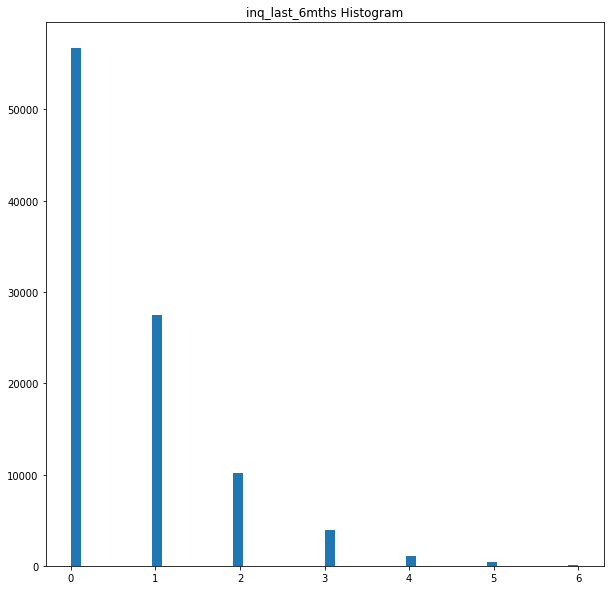

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(df['inq_last_6mths'], bins=50)
plt.title('inq_last_6mths Histogram')
plt.show()

In [ ]:
test_df['revol_util'].describe()

count    35816.000000
mean         0.534209
std          0.237467
min          0.000000
25%          0.356750
50%          0.539000
75%          0.717000
max          1.310000
Name: revol_util, dtype: float64

In [ ]:
for i in remain_features:
    if len(df[i].unique()) < 50:
        print(f'The unique value of {i} is {sorted(df[i].unique())} and {sorted(test_df[i].unique())}')

The unique value of delinq_2yrs is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20] and [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 20]
The unique value of inq_last_6mths is [0, 1, 2, 3, 4, 5, 6] and [0, 1, 2, 3, 4, 5, 6]
The unique value of pub_rec is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 20, 21, 22, 25, 63] and [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 17]
The unique value of collections_12_mths_ex_med is [0, 1, 2, 3, 4, 5] and [0, 1, 2, 3, 4, 6, 7]
The unique value of acc_now_delinq is [0, 1, 2, 3, 4, 5, 6] and [0, 1, 2, 3, 4]
The unique value of chargeoff_within_12_mths is [0, 1, 2, 3, 4, 5, 7] and [0, 1, 2, 3]
The unique value of tax_liens is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 20, 21, 22, 24, 63] and [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 16]
The unique value of term1 is [0, 1] and [0, 1]
The unique value of out_prncp is [0.0, 43.26, 136.24, 216.74, 283.37, 471.7, 492.07, 499.52, 508.0, 539.36, 628.43, 687.93, 698.

In [ ]:
df['acc_defer'] = df['acc_now_delinq'] / df['total_acc']

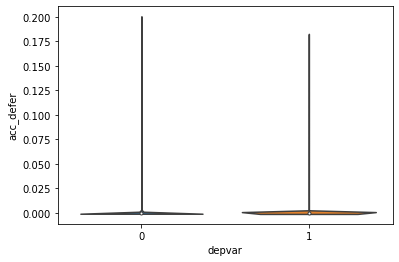

In [ ]:
sns.violinplot(x= 'depvar', y= 'acc_defer', data=df)

In [ ]:
for i in remain_features:
    if len(df[i].unique()) < 50:
        print(f'The unique value of {i} is {sorted(df_0[i].unique())} and {sorted(df_1[i].unique())}')

The unique value of delinq_2yrs is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19] and [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20]
The unique value of inq_last_6mths is [0, 1, 2, 3, 4, 5, 6] and [0, 1, 2, 3, 4, 5, 6]
The unique value of pub_rec is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 20, 22, 63] and [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 21, 25]
The unique value of collections_12_mths_ex_med is [0, 1, 2, 3, 4, 5] and [0, 1, 2, 3, 4]
The unique value of acc_now_delinq is [0, 1, 2, 3, 4] and [0, 1, 2, 3, 5, 6]
The unique value of chargeoff_within_12_mths is [0, 1, 2, 3, 4, 7] and [0, 1, 2, 3, 4, 5]
The unique value of tax_liens is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17, 20, 22, 63] and [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 21, 24]
The unique value of term1 is [0, 1] and [0, 1]
The unique value of out_prncp is [0.0] and [0.0, 43.26, 136.24, 216.74, 283.37, 471.7, 492.07, 499.52, 508.0, 539.36, 628.43, 68

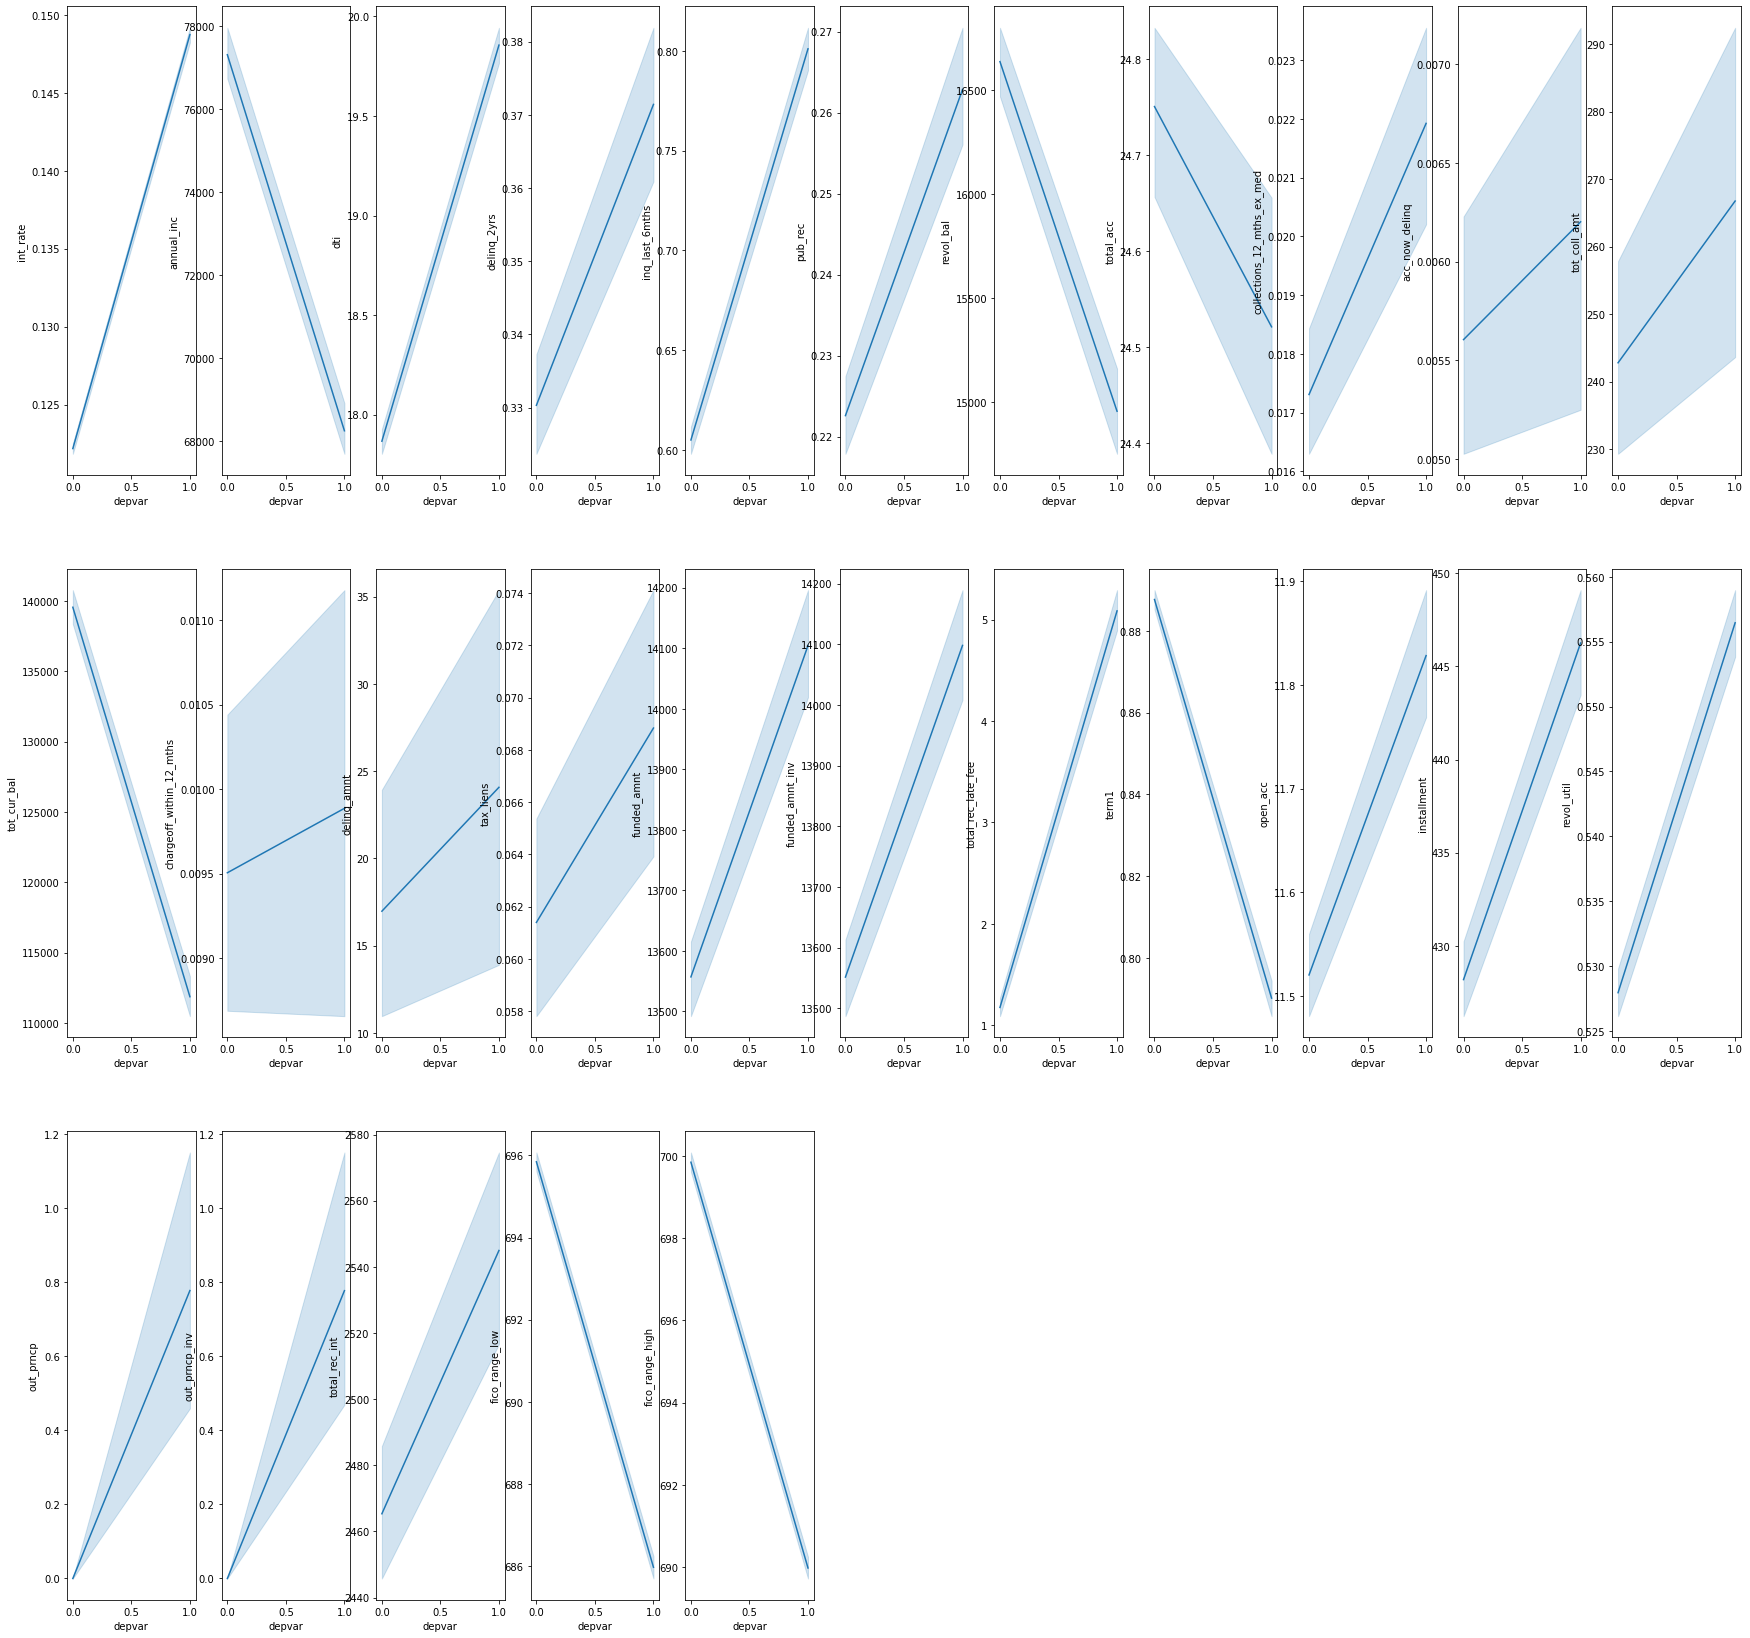

In [ ]:
plt.figure(figsize=(30,50))
count = 1

for i in remain_features:
    plt.subplot(5, 11, count)
    p = sns.lineplot(data = df, y=i, x = 'depvar')
    count += 1
plt.show()

In [ ]:
test_df['collections_12_mths_ex_med'].value_counts()

0    35181
1      588
2       39
3        4
4        2
7        1
6        1
Name: collections_12_mths_ex_med, dtype: int64

## Heat map을 통한 각 변수간 상관관계 엿보기

In [ ]:
# categorial col을 제외한 모든 col을 선택
features = ['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_bal', 'total_acc',
            'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'chargeoff_within_12_mths',
            'delinq_amnt', 'tax_liens', 'funded_amnt', 'funded_amnt_inv', 'total_rec_late_fee', 'term1', 'open_acc',
            'installment', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_rec_int', 'fico_range_low', 'fico_range_high',
            'depvar']

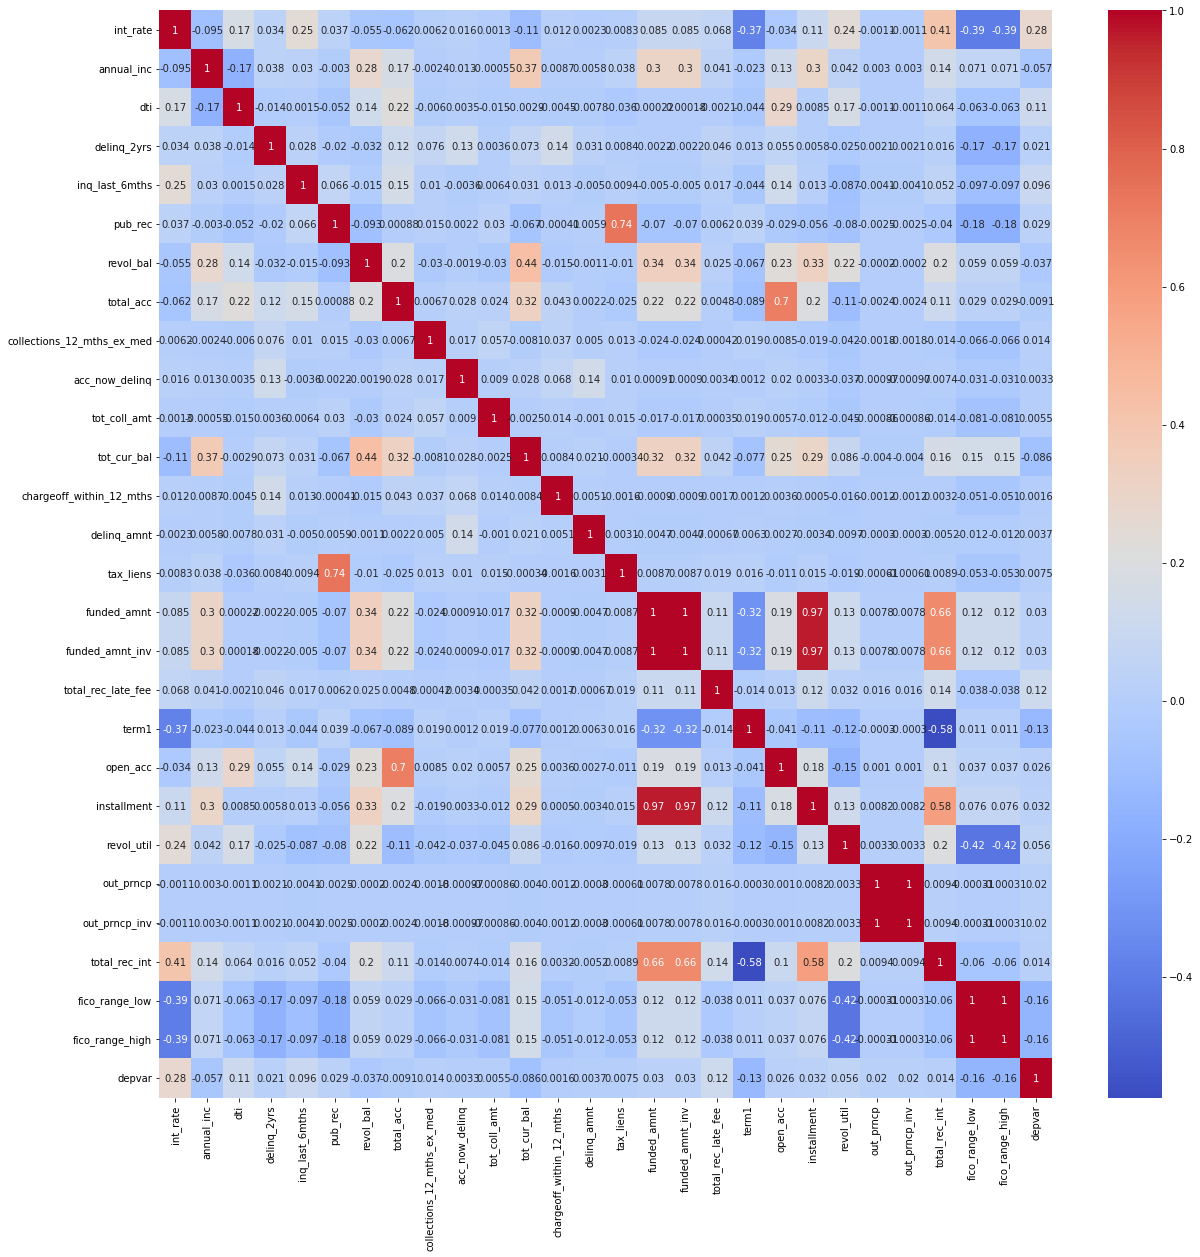

In [ ]:
# 몇몇 feature 간의 상관계수가 매우 높은것을 알 수 있다.(예: funded_amnt, funded_amnt_inv, installment)
# 해당 feature들을 조정하면 더 좋은 결과를 얻을 수 있을 것 같다.

plt.figure(figsize=(20,20))
sns.heatmap(df[features].corr(), cmap='coolwarm', annot=True)
plt.show()